<h2 style='color:blue' align='center'>Actors Image Classification: Notebook
    <h2>

<img src="photo.png" alt="This project aims to classify the following actors" style="width: 1000px;"/>



In [24]:
!pip install opencv-python==3.4.18.65
!pip install pywavelets==0.5.2


   ---------------------------------------- 0.0/31.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/31.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/31.3 MB 1.5 MB/s eta 0:00:21
   ---------------------------------------- 0.3/31.3 MB 2.0 MB/s eta 0:00:16
   ---------------------------------------- 0.4/31.3 MB 2.2 MB/s eta 0:00:14
    --------------------------------------- 0.5/31.3 MB 2.3 MB/s eta 0:00:14
    --------------------------------------- 0.7/31.3 MB 2.7 MB/s eta 0:00:12
   - -------------------------------------- 0.8/31.3 MB 3.0 MB/s eta 0:00:11
   - -------------------------------------- 1.0/31.3 MB 3.0 MB/s eta 0:00:11
   - -------------------------------------- 1.0/31.3 MB 3.0 MB/s eta 0:00:11
   - -------------------------------------- 1.0/31.3 MB 3.0 MB/s eta 0:00:11
   - -------------------------------------- 1.0/31.3 MB 3.0 MB/s eta 0:00:11
   - -------------------------------------- 1.0/31.3 MB 3.0 MB/s eta 0:00:11
   - --------

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached PyWavelets-0.5.2.tar.gz (4.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pywavelets
Failed to build pywavelets


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [57 lines of output]
  C:\Users\admin\AppData\Local\Temp\pip-install-zlrbtf_0\pywavelets_c1149434a98b4bf093e42a41c5321ebd\setup.py:69: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
    import imp
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pywt
  copying pywt\version.py -> build\lib.win-amd64-cpython-311\pywt
  copying pywt\_cwt.py -> build\lib.win-amd64-cpython-311\pywt
  copying pywt\_dwt.py -> build\lib.win-amd64-cpython-311\pywt
  copying pywt\_functions.py -> build\lib.win-amd64-cpython-311\pywt
  copying pywt\_multidim.py -> build\lib.win-amd64-cpython-311\pywt
  copying pywt\_multilevel.py -> build\lib.win-amd64-cpython-311\pywt
  copy

In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### When we look at any image, mainly we can identify a person by looking into his face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [3]:
#this line says that there 1-height, 2-width, 3-color
img = cv2.imread('./test_images/angelina_jolie_106.jpg')
img.shape

(900, 601, 3)

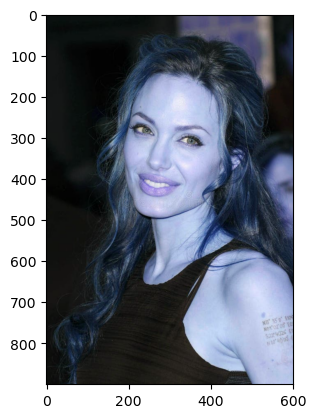

In [4]:
plt.imshow(img)

In [5]:
# we changed the color of the image to gray, and we see the third value from the shape has dissappeared
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 601)

In [6]:
gray

array([[ 18,  18,  18, ...,  22,  22,  22],
       [ 18,  18,  18, ...,  22,  22,  22],
       [ 18,  18,  18, ...,  22,  21,  22],
       ...,
       [ 12,  13,  13, ..., 208, 208, 209],
       [ 12,  13,  13, ..., 208, 208, 207],
       [ 12,  13,  13, ..., 207, 207, 206]], dtype=uint8)

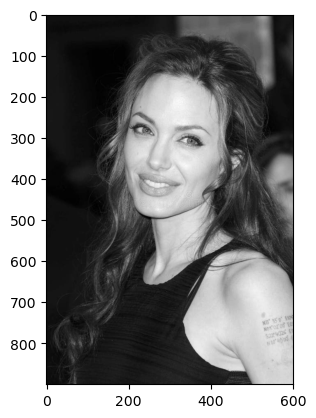

In [7]:
plt.imshow(gray, cmap='gray')

In [9]:
#downloading opencv cascades to help to detect face in the image
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[137, 169, 331, 331]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(137, 169, 331, 331)

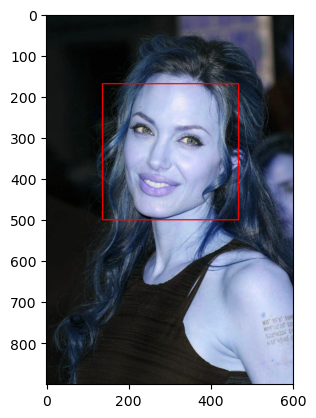

In [12]:
#separating the face area
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

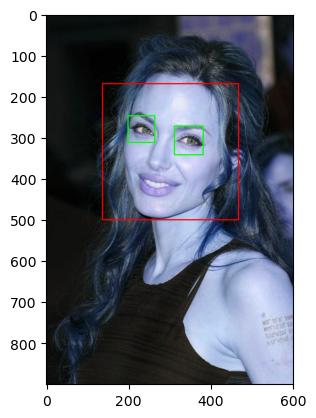

In [36]:
#drawing a rectangle over a face (region we are intereted) plus outlining eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

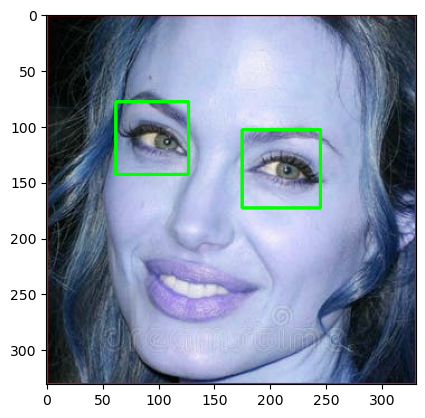

In [37]:
#this is roi_color (region of interest) to show this is the rectangle we are looking for
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
# this function does everything what previosly done with less code. We create it in order to use it for all other images
#def get_cropped_image_if_2_eyes(image_path):
    #img = cv2.imread(r"image_path")
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #for (x,y,w,h) in faces:
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]
        #eyes = eye_cascade.detectMultiScale(roi_gray)
        #if len(eyes) >= 2:
            #return roi_color

In [15]:
# this function does everything what previosly done with less code. We create it in order to use it for all other images
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)  # Use the variable image_path
    if img is None:
        print(f"Could not read the image: {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    
    return None

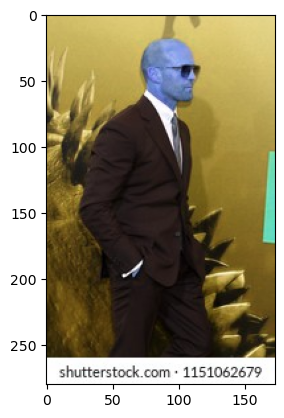

In [20]:
#from this image, it is difficult detect both eyes
original_image = cv2.imread('./test_images/jason_statham_25.jpg')
plt.imshow(original_image)

Could not read the image: ./jason_statham_25.jpg


TypeError: Image data of dtype object cannot be converted to float

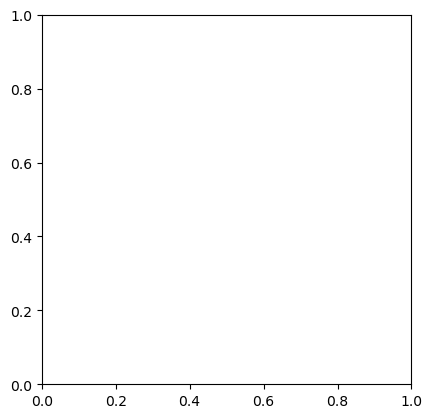

In [38]:
#because it's difficult to detect eyes our function can't read, making it convenient to read only image where eyes can be detected
cropped_image = get_cropped_image_if_2_eyes('./jason_statham_25.jpg')
plt.imshow(cropped_image)

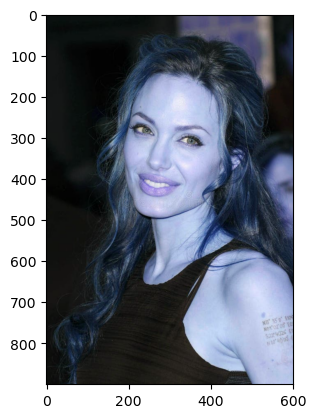

In [39]:
org_image_obstructed = cv2.imread('./test_images/angelina_jolie_106.jpg')
plt.imshow(org_image_obstructed)

In [23]:
#we call our function for face detection and there is no output because 2 eyes aren't clearly visible, thus making the value of the function NONE
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/angelina_jolie_106.jpg')
cropped_image_no_2_eyes

array([[[ 5,  5,  5],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [25, 34, 48],
        [19, 28, 42],
        [15, 24, 38]],

       [[ 6,  6,  6],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [28, 37, 51],
        [26, 35, 49],
        [23, 32, 46]],

       [[ 7,  7,  7],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [28, 37, 51],
        [34, 43, 57],
        [34, 43, 57]],

       ...,

       [[24, 24, 24],
        [22, 22, 22],
        [15, 15, 15],
        ...,
        [22, 34, 52],
        [24, 36, 54],
        [15, 27, 45]],

       [[23, 23, 23],
        [22, 22, 22],
        [15, 15, 15],
        ...,
        [21, 33, 51],
        [24, 36, 54],
        [19, 31, 49]],

       [[22, 22, 22],
        [21, 21, 21],
        [16, 16, 16],
        ...,
        [19, 31, 49],
        [24, 36, 54],
        [22, 34, 52]]], dtype=uint8)

In [24]:
#creating a 'cropped' folder to put our training data
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [25]:
#the function goes through sub directories in dataset 
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
#ensuring we have all the folders
img_dirs

['./dataset/angelina_jolie',
 './dataset/cropped',
 './dataset/denzel_washington',
 './dataset/jackie_chan',
 './dataset/jason_statham',
 './dataset/leonardo_dicaprio',
 './dataset/tom_cruise']

In [28]:
#if the folder exist, delete it, and than create a new one
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
#a loop for going through each actors images, crop them and store them into 'cropped' folder
#NOTE images without complete 2 eyes will not be detected, thus can't be read
cropped_image_dirs = []
actor_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    actor_name = img_dir.split('/')[-1]
    print(actor_name)
    
    actor_file_names_dict[actor_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + actor_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                    
                cropped_file_name = actor_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
                
                cv2.imwrite(cropped_file_path, roi_color)
                actor_file_names_dict[actor_name].append(cropped_file_path)
                count += 1    

angelina_jolie
Generating cropped images in folder:  ./dataset/cropped/angelina_jolie
Could not read the image: ./dataset/angelina_jolie\angelina_jolie_108.jpg
Could not read the image: ./dataset/angelina_jolie\angelina_jolie_109.jpg
cropped
denzel_washington
Generating cropped images in folder:  ./dataset/cropped/denzel_washington
Could not read the image: ./dataset/denzel_washington\denzel_washington_82.jpg
Could not read the image: ./dataset/denzel_washington\denzel_washington_83.jpg
jackie_chan
Generating cropped images in folder:  ./dataset/cropped/jackie_chan
Could not read the image: ./dataset/jackie_chan\jackie_chan_133.jpg
Could not read the image: ./dataset/jackie_chan\jackie_chan_134.jpg
jason_statham
Generating cropped images in folder:  ./dataset/cropped/jason_statham
leonardo_dicaprio
Generating cropped images in folder:  ./dataset/cropped/leonardo_dicaprio
Could not read the image: ./dataset/leonardo_dicaprio\leonardo_dicaprio_108.jpg
Could not read the image: ./dataset/

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### Wavelet transformation is a technique that allows machine to clearly see the structure of the face like eyes, nose, lips and so on. It is essential for training our model

### Wavelet transform

In [30]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

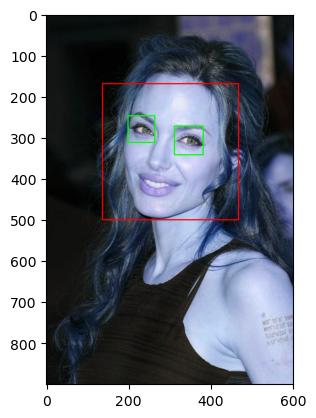

In [40]:
#drawing a rectangle over a face (region we are intereted) plus outlining eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

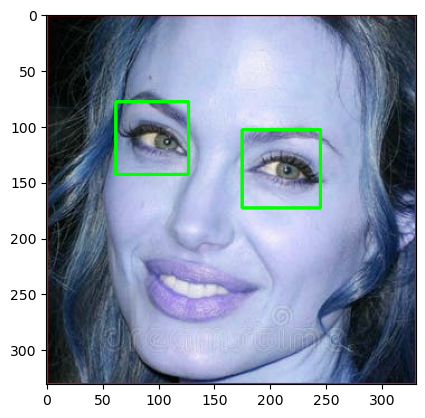

In [41]:
plt.imshow(roi_color, cmap='gray')

In [42]:
cropped_img = np.array(roi_color)
cropped_img.shape

(331, 331, 3)

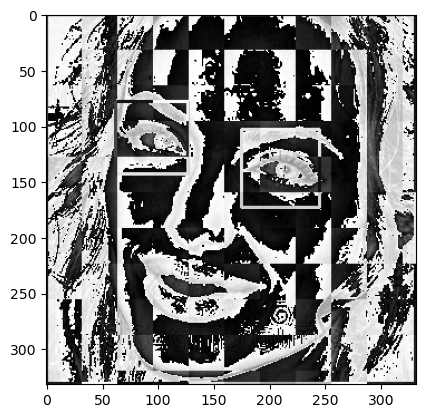

In [44]:
#this is a wavelet transformed image
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

<img src="cropped_images.png" alt="This project aims to classify the following actors" style="width: 1000px;"/>


Before we start our training model we have to ensure that our data is fully clean. Go to **cropped** folder and remove all the images of other people.For instance, see above how Jason Statham's folder contains the images of his wife and other people. We have to delete them manually, to ensure we have the needed person in each image folder.

In [61]:
class_dict = {}
count = 0
for actor_name in actor_file_names_dict.keys():
    if actor_name =='cropped':
        continue
    class_dict[actor_name] = count
    count = count + 1
class_dict

{'angelina_jolie': 0,
 'denzel_washington': 1,
 'jackie_chan': 2,
 'jason_statham': 3,
 'leonardo_dicaprio': 4,
 'tom_cruise': 5}

In [69]:
X, y = [], []
for actor_name, training_files in actor_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[actor_name])   

In [70]:
len(X[0])

4096

In [71]:
X[0]

array([[ 43],
       [ 37],
       [ 40],
       ...,
       [ 45],
       [  9],
       [167]], dtype=uint8)

In [72]:
#we are reshaping our test dataset into array because the model doesnt accept list as an input
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(236, 4096)

In [73]:
X[0]

array([ 43.,  37.,  40., ...,  45.,   9., 167.])

In [74]:
len(y)

236

### Our data gone through cleaning process earlier. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [75]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8135593220338984

In [77]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.94      0.84      0.89        19
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         8
           4       0.71      0.77      0.74        13
           5       1.00      0.50      0.67         4

    accuracy                           0.81        59
   macro avg       0.88      0.80      0.82        59
weighted avg       0.85      0.81      0.82        59



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best model with best fine tuned parameters

In [78]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [79]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.830159,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.599048,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.818889,{'logisticregression__C': 1}


In [80]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [84]:
#AS WE CAN SEE SUPPORT VECTOR MACHINE MODEL IS THE PERFROMER WITH 90% ACCURACY ALMOST
best_estimators['svm'].score(X_test,y_test)

0.8983050847457628

In [85]:
best_estimators['random_forest'].score(X_test,y_test)

0.576271186440678

In [86]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8813559322033898

In [87]:
best_clf = best_estimators['svm']

Text(95.72222222222221, 0.5, 'Truth')

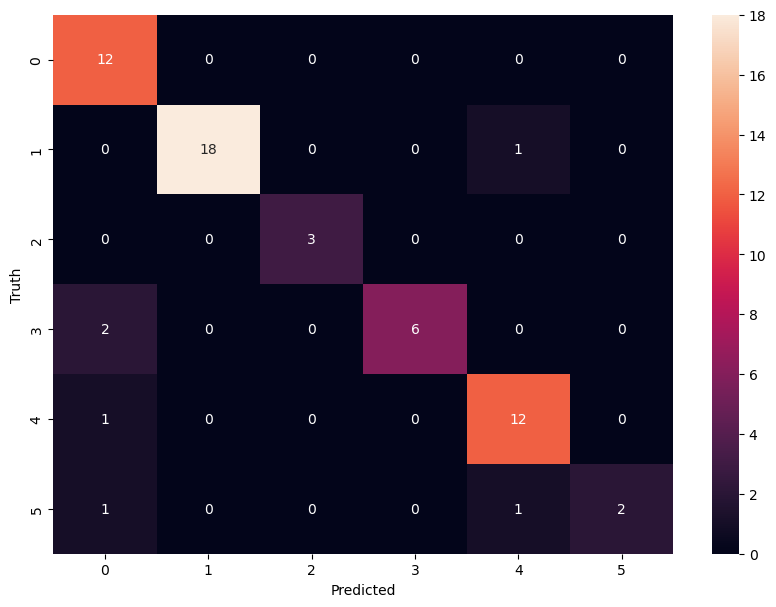

In [89]:
#LET'S SEE WHERE OUR MODEL MADE MISTAKES USING CONFUSION MATRIX
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
class_dict

{'angelina_jolie': 0,
 'denzel_washington': 1,
 'jackie_chan': 2,
 'jason_statham': 3,
 'leonardo_dicaprio': 4,
 'tom_cruise': 5}

### Save the trained model

In [91]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [92]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

### As we can see SVM model was the best performer to classify our images with the accuracy of 90%